## Ex 3: Use the dev or validation set to tune the strength of smoothing (or regularization) for the trigram model
- Use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. 
- What patterns can you see in the train and dev set loss as you tune this strength? 
- Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

### Load Data

In [37]:
# Load the names.txt file
words = open("data/names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [38]:
import torch

In [39]:
unique_chars = sorted(list(set("".join(words))))
bigram_to_int = {}
index = 1
for ch in ["."]+ unique_chars:
    for ch_n in unique_chars + ["."]:
        if ch + ch_n != "..":
            bigram_to_int[ch + ch_n] = index
            index += 1
bigram_to_int[".."] = 0

In [40]:
# Start the character index from 1
int_to_char = {i + 1: char for i, char in enumerate(sorted(unique_chars))}
int_to_char[0] = "."
print(int_to_char) 

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [41]:
bigram_to_int

{'.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'aa': 27,
 'ab': 28,
 'ac': 29,
 'ad': 30,
 'ae': 31,
 'af': 32,
 'ag': 33,
 'ah': 34,
 'ai': 35,
 'aj': 36,
 'ak': 37,
 'al': 38,
 'am': 39,
 'an': 40,
 'ao': 41,
 'ap': 42,
 'aq': 43,
 'ar': 44,
 'as': 45,
 'at': 46,
 'au': 47,
 'av': 48,
 'aw': 49,
 'ax': 50,
 'ay': 51,
 'az': 52,
 'a.': 53,
 'ba': 54,
 'bb': 55,
 'bc': 56,
 'bd': 57,
 'be': 58,
 'bf': 59,
 'bg': 60,
 'bh': 61,
 'bi': 62,
 'bj': 63,
 'bk': 64,
 'bl': 65,
 'bm': 66,
 'bn': 67,
 'bo': 68,
 'bp': 69,
 'bq': 70,
 'br': 71,
 'bs': 72,
 'bt': 73,
 'bu': 74,
 'bv': 75,
 'bw': 76,
 'bx': 77,
 'by': 78,
 'bz': 79,
 'b.': 80,
 'ca': 81,
 'cb': 82,
 'cc': 83,
 'cd': 84,
 'ce': 85,
 'cf': 86,
 'cg': 87,
 'ch': 88,
 'ci': 89,
 'cj': 90,
 'ck': 91,
 'cl': 9

In [42]:
int_to_bigram = {i: bg for bg, i in bigram_to_int.items()}
int_to_bigram

{1: '.a',
 2: '.b',
 3: '.c',
 4: '.d',
 5: '.e',
 6: '.f',
 7: '.g',
 8: '.h',
 9: '.i',
 10: '.j',
 11: '.k',
 12: '.l',
 13: '.m',
 14: '.n',
 15: '.o',
 16: '.p',
 17: '.q',
 18: '.r',
 19: '.s',
 20: '.t',
 21: '.u',
 22: '.v',
 23: '.w',
 24: '.x',
 25: '.y',
 26: '.z',
 27: 'aa',
 28: 'ab',
 29: 'ac',
 30: 'ad',
 31: 'ae',
 32: 'af',
 33: 'ag',
 34: 'ah',
 35: 'ai',
 36: 'aj',
 37: 'ak',
 38: 'al',
 39: 'am',
 40: 'an',
 41: 'ao',
 42: 'ap',
 43: 'aq',
 44: 'ar',
 45: 'as',
 46: 'at',
 47: 'au',
 48: 'av',
 49: 'aw',
 50: 'ax',
 51: 'ay',
 52: 'az',
 53: 'a.',
 54: 'ba',
 55: 'bb',
 56: 'bc',
 57: 'bd',
 58: 'be',
 59: 'bf',
 60: 'bg',
 61: 'bh',
 62: 'bi',
 63: 'bj',
 64: 'bk',
 65: 'bl',
 66: 'bm',
 67: 'bn',
 68: 'bo',
 69: 'bp',
 70: 'bq',
 71: 'br',
 72: 'bs',
 73: 'bt',
 74: 'bu',
 75: 'bv',
 76: 'bw',
 77: 'bx',
 78: 'by',
 79: 'bz',
 80: 'b.',
 81: 'ca',
 82: 'cb',
 83: 'cc',
 84: 'cd',
 85: 'ce',
 86: 'cf',
 87: 'cg',
 88: 'ch',
 89: 'ci',
 90: 'cj',
 91: 'ck',
 92: 'cl

In [43]:
# Create a mapping from character to index
unique_chars = sorted(list(set("".join(words))))
# Start the character index from 1
char_to_int = {char: i + 1 for i, char in enumerate(sorted(unique_chars))}
char_to_int["."] = 0
print(char_to_int)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [44]:
# Start the character index from 1
int_to_char = {i + 1: char for i, char in enumerate(sorted(unique_chars))}
int_to_char[0] = "."
print(int_to_char) 

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [45]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.model_selection import train_test_split

# First split into train (80%) and temp (20%)
words_train, words_temp = train_test_split(words, test_size=0.2, random_state=42)

# Then split temp into validation (10%) and test (10%)
words_val, words_test = train_test_split(words_temp, test_size=0.5, random_state=42)

print(f"Train set size: {len(words_train)}")
print(f"Validation set size: {len(words_val)}")
print(f"Test set size: {len(words_test)}")

Train set size: 25626
Validation set size: 3203
Test set size: 3204


In [47]:
import torch.nn.functional as F

### Prepare Training Set

In [48]:
xtrain_s = [] # These are the input bigrams for the model
ytrain_s = []  # These are the target labels for the x values (or output values)
for word in words_train:
    # first add  start and end tokens
    new_word = [".", "."] + list(word) + [".", "."]
    for trigram in zip(new_word, new_word[1:], new_word[2:]):
            # print(trigram[0] + trigram[1], trigram[2])
            index1 = bigram_to_int[trigram[0] + trigram[1]]
            index2 = char_to_int[trigram[2]]
            xtrain_s.append(index1)
            ytrain_s.append(index2)

# NOTE: Always use torch.tensor not torch.Tensor as it preserves the data type of the original data.
# (see SO threads for the differences)
xs_train = torch.tensor(xtrain_s) 
ys_train = torch.tensor(ytrain_s)
num_elements = xs_train.nelement()
print("Number of examples in the dataset: ", num_elements)

Number of examples in the dataset:  208123


### Prepare Validation Set

In [49]:
xval_s = [] # These are the input bigrams for the model
yval_s = []  # These are the target labels for the x values (or output values)
for word in words_val:
    # first add  start and end tokens
    new_word = [".", "."] + list(word) + [".", "."]
    for trigram in zip(new_word, new_word[1:], new_word[2:]):
            # print(trigram[0] + trigram[1], trigram[2])
            index1 = bigram_to_int[trigram[0] + trigram[1]]
            index2 = char_to_int[trigram[2]]
            xval_s.append(index1)
            yval_s.append(index2)

# NOTE: Always use torch.tensor not torch.Tensor as it preserves the data type of the original data.
# (see SO threads for the differences)
xs_val = torch.tensor(xval_s) 
ys_val = torch.tensor(yval_s)
num_elements = xs_val.nelement()
print("Number of examples in the dataset: ", num_elements)

Number of examples in the dataset:  26085


### Prepare Test set

In [50]:
xtest_s = [] # These are the input bigrams for the model
ytest_s = []  # These are the target labels for the x values (or output values)
for word in words_test:
    # first add  start and end tokens
    new_word = [".", "."] + list(word) + [".", "."]
    for trigram in zip(new_word, new_word[1:], new_word[2:]):
            # print(trigram[0] + trigram[1], trigram[2])
            index1 = bigram_to_int[trigram[0] + trigram[1]]
            index2 = char_to_int[trigram[2]]
            xtest_s.append(index1)
            ytest_s.append(index2)

# NOTE: Always use torch.tensor not torch.Tensor as it preserves the data type of the original data.
# (see SO threads for the differences)
xs_test = torch.tensor(xtest_s) 
ys_test = torch.tensor(ytest_s)
num_elements = xs_test.nelement()
print("Number of examples in the dataset: ", num_elements)

Number of examples in the dataset:  25971


### Training the Neural Network
- Training the neural network using the training set.

In [51]:
def compute_loss(x, y, W, reg_strength=0.01):
    ### Forward Pass ####
    n_elements = x.nelement()
    # Encode the input as one-hot vectors
    x_encoded = F.one_hot(x, num_classes=729).float()
    # Convert the one-hot encoded input to logits
    logits = x_encoded @ W
    # The next 2 lines are called as Softmax function
    counts = logits.exp()
    probabilities = counts / counts.sum(1, keepdim=True)
    loss = - probabilities[torch.arange(n_elements), y].log().mean() + reg_strength * (W ** 2).mean()
    return loss

In [93]:
# ---------- Initialize the Network ------------
# Generator for similar output of W at each run
# set a manual seed for the random number generator to ensure reproducibility. 
g_nn = torch.Generator().manual_seed(2147483647)
# First we will initialize the weights using uniform distribution.
W_train = torch.randn((729, 27), generator=g_nn, requires_grad=True)

In [92]:
training_loss = []
validation_loss = []
reg_strength = 0.0001

In [94]:
# Training Loop - Gradient Descent
for k in range(1000):
    # forward pass
    train_loss = compute_loss(xs_train, ys_train, W_train, reg_strength=reg_strength)
    training_loss.append(train_loss.item())
    print(f"Iteration {k + 1}")
    print("Training Loss: ", train_loss.item())
    val_loss = compute_loss(xs_val, ys_val, W_train, reg_strength=reg_strength)
    validation_loss.append(val_loss.item())
    print("Validation Loss: ", val_loss.item())
    print("----------------------------------------------")
    # ----------- Backward Pass (Backpropagation) --------------------
    # Set the gradient to zero before backpropagation
    W_train.grad = None
    train_loss.backward()

    # update weights
    W_train.data += - 50 * W_train.grad

Iteration 1
Training Loss:  3.864044666290283
Validation Loss:  3.866162061691284
----------------------------------------------
Iteration 2
Training Loss:  3.6442387104034424
Validation Loss:  3.6443169116973877
----------------------------------------------
Iteration 3
Training Loss:  3.483103036880493
Validation Loss:  3.4812352657318115
----------------------------------------------
Iteration 4
Training Loss:  3.363480806350708
Validation Loss:  3.3602654933929443
----------------------------------------------
Iteration 5
Training Loss:  3.275066375732422
Validation Loss:  3.2711775302886963
----------------------------------------------
Iteration 6
Training Loss:  3.2046258449554443
Validation Loss:  3.200423240661621
----------------------------------------------
Iteration 7
Training Loss:  3.14526104927063
Validation Loss:  3.140840530395508
----------------------------------------------
Iteration 8
Training Loss:  3.0936572551727295
Validation Loss:  3.089024305343628
---------

### Plot the Training and Validation Loss

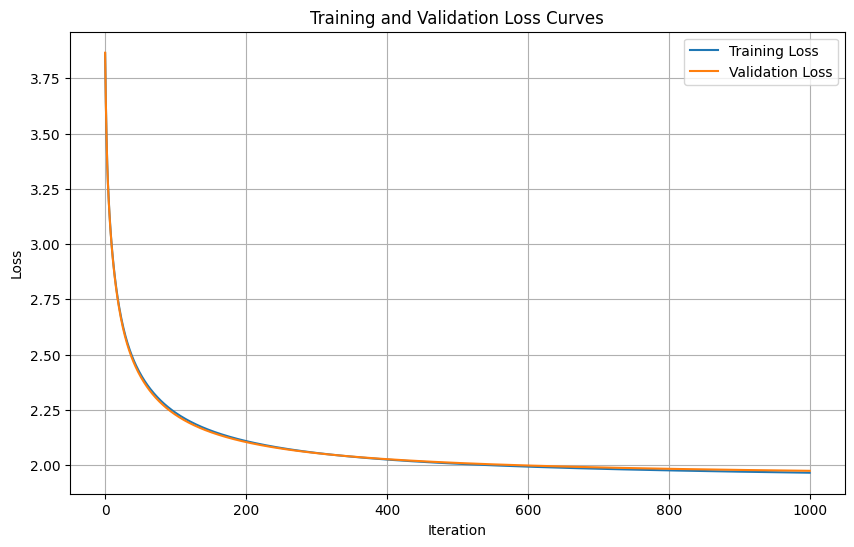

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
# If the training and validation loss curves are almost the same, it generally means that the model is not overfitting.
# This suggests that the model generalizes well to unseen data and is not simply memorizing the training set.
# It may also indicate that the model is underfitting if both losses are high, meaning it is not complex enough to capture the underlying patterns in the data.
plt.show()

#### Calculating Loss on Test Set
- Initial loss calculation on the test set (Without training) : 3.8765175342559814
- Final Test Loss:  2.0054373741149902 (Still high, but improved from initial)

In [96]:
# To evaluate the model, we will use the test set.
test_loss = compute_loss(xs_test, ys_test, W_train, reg_strength=reg_strength)

In [97]:
print("Initial Test Loss: ", test_loss.item())

Initial Test Loss:  1.9922212362289429


In [98]:
print("Final Test Loss: ", test_loss.item())

Final Test Loss:  1.9922212362289429


### Save Results

In [69]:
import os
import json


In [99]:
training_results = [{
    "regularization_strength": reg_strength,
    "training_loss": training_loss,
    "validation_loss": validation_loss,
    "test_loss": test_loss.item(),
}]

In [100]:
if not os.path.exists("training_results"):
    os.makedirs("training_results")

# Save the training and validation losses
if not os.path.exists("training_results/training_results_1.json"):
    with open("training_results/training_results_1.json", "w") as f:
        json.dump(training_results, f, indent=4)
   
else:
    with open("training_results/training_results_1.json", "r") as f:
        existing_results = json.load(f)  
    existing_results.extend(training_results)
    with open("training_results/training_results_1.json", "w") as f:
        json.dump(existing_results, f, indent=4)

## Plot all the Losses

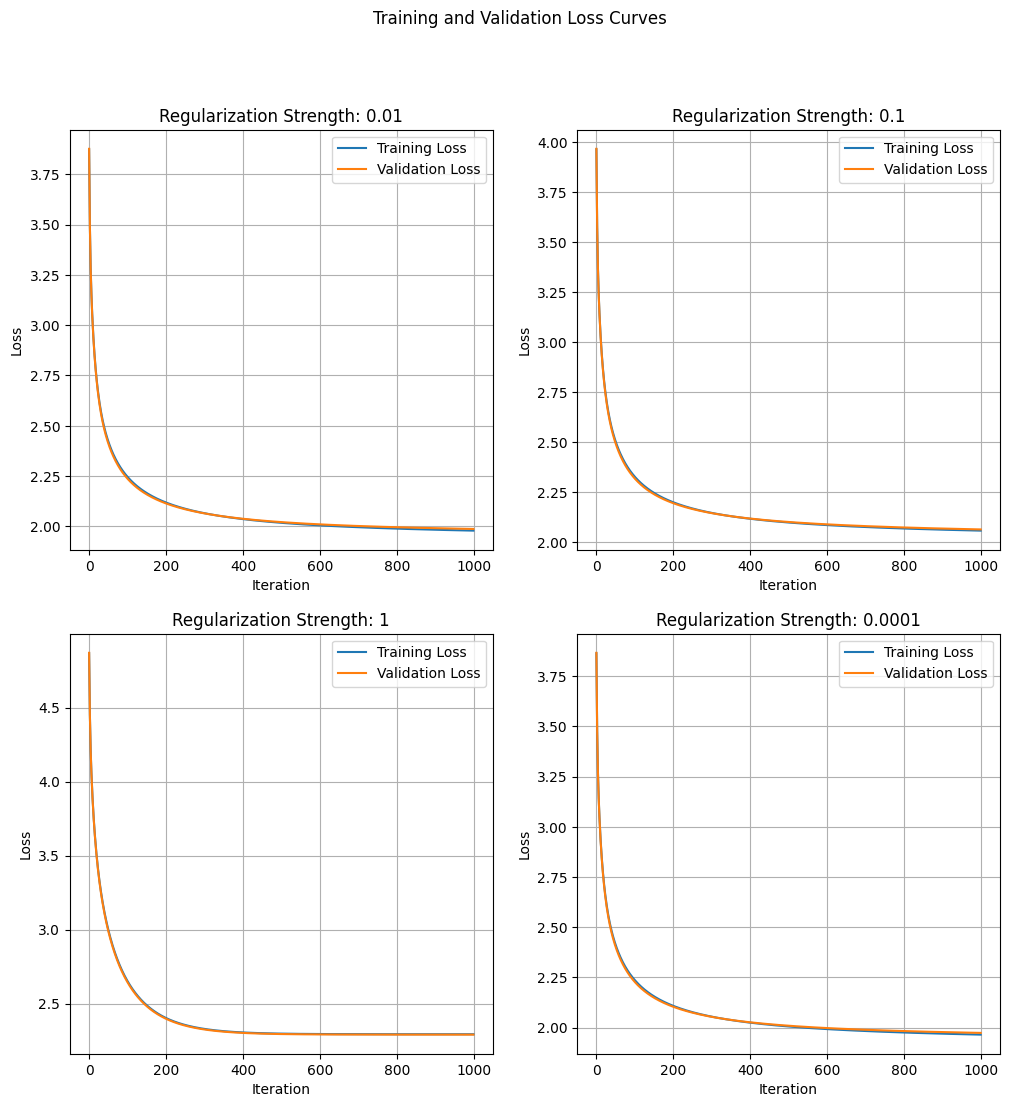

In [124]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axes = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
fig.suptitle('Training and Validation Loss Curves')

for i, ax in enumerate(axes):
    ax.plot(existing_results[i]["training_loss"], label='Training Loss')
    ax.plot(existing_results[i]["validation_loss"], label='Validation Loss')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title(f'Regularization Strength: {existing_results[i]["regularization_strength"]}')
    ax.legend()
    ax.grid(True)

In [126]:
for result in existing_results:
    print(f"Regularization Strength: {result['regularization_strength']}")
    print(f"Final Training Loss: {result['training_loss'][-1]}")
    print(f"Final Validation Loss: {result['validation_loss'][-1]}")
    print(f"Final Test Loss: {result['test_loss']}")
    print("----------------------------------------------")


Regularization Strength: 0.01
Final Training Loss: 1.9789692163467407
Final Validation Loss: 1.9873093366622925
Final Test Loss: 2.0054373741149902
----------------------------------------------
Regularization Strength: 0.1
Final Training Loss: 2.055934190750122
Final Validation Loss: 2.061966896057129
Final Test Loss: 2.0786163806915283
----------------------------------------------
Regularization Strength: 1
Final Training Loss: 2.2934536933898926
Final Validation Loss: 2.290776014328003
Final Test Loss: 2.3048348426818848
----------------------------------------------
Regularization Strength: 0.0001
Final Training Loss: 1.9652292728424072
Final Validation Loss: 1.9738678932189941
Final Test Loss: 1.9922212362289429
----------------------------------------------


### Summary of using different values of Regularization Strength in model training
#### 1000 Iterations
- Regularization Strength: 0.0001
  - Final Training Loss: 1.9652292728424072
  - Final Validation Loss: 1.9738678932189941
  - Final Test Loss: 1.9922212362289429
  - The Validation and Test loss are slightly higher than the training loss, indicating some overfitting.

- Regularization Strength: 0.01
  - Final Training Loss: 1.9789692163467407
  - Final Validation Loss: 1.9873093366622925
  - Final Test Loss: 2.0054373741149902
  - The Validation and Test loss are slightly higher than the training loss, indicating some overfitting.

- Regularization Strength: 0.1
  - Final Training Loss: 2.055934190750122
  - Final Validation Loss: 2.061966896057129
  - Final Test Loss: 2.0786163806915283
  - The Validation and Test loss are almost similar to the training loss, but the loss is higher than the previous two regularization strengths, indicating that this strength might be too high and leading to underfitting.

- Regularization Strength: 1.0
  - Final Training Loss: 2.2934536933898926
  - Final Validation Loss: 2.290776014328003
  - Final Test Loss: 2.3048348426818848
  - The Validation and Test loss are significantly higher than the training loss, indicating that this strength is too high and leading to underfitting.

- The Summary of the losses shows that as the regularization strength increases, the training loss tends to increase while the validation and test losses also increase, indicating a trend towards underfitting. The best performance was observed with a regularization strength of 0.0001, which provided the lowest losses across training, validation, and test sets.

- The best test loss achieved was 1.9922212362289429with a regularization strength of 0.0001, indicating that this setting provided the best balance between fitting the training data and generalizing to unseen data.